# Модель анализатора фото

In [2]:
import os

dataset_path = "image/"
print(os.listdir(dataset_path))


['alfredo', 'broccoli', 'brownie', 'cake', 'carrot', 'cereal', 'cheese', 'chicken', 'chocolate', 'coffee', 'cookie', 'corn', 'couscous', 'crab', 'donut', 'egg', 'fajitas', 'fries', 'grilledcheese', 'hotdog', 'icecream', 'macncheese', 'nachos', 'nuggets', 'rice', 'salad', 'salmon', 'shrimp', 'soup', 'steak', 'sushi', 'tartare']


## Загружаем изображения

И обрабатываем аугментацией (сдвиги повороты)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height, img_width = 224, 224
batch_size = 32


datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,        # Поворот изображения
    width_shift_range=0.2,    # Сдвиг по ширине
    height_shift_range=0.2,   # Сдвиг по высоте
    shear_range=0.2,          # Искажение (shear)
    zoom_range=0.2,           # Масштабирование
    horizontal_flip=True,     # Отражение по горизонтали                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
    fill_mode='nearest'       # Заполнение пикселей после трансформации
)

# Пересоздаем генераторы с аугментацией
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 7609 images belonging to 32 classes.
Found 1881 images belonging to 32 classes.


## Анализ данных 

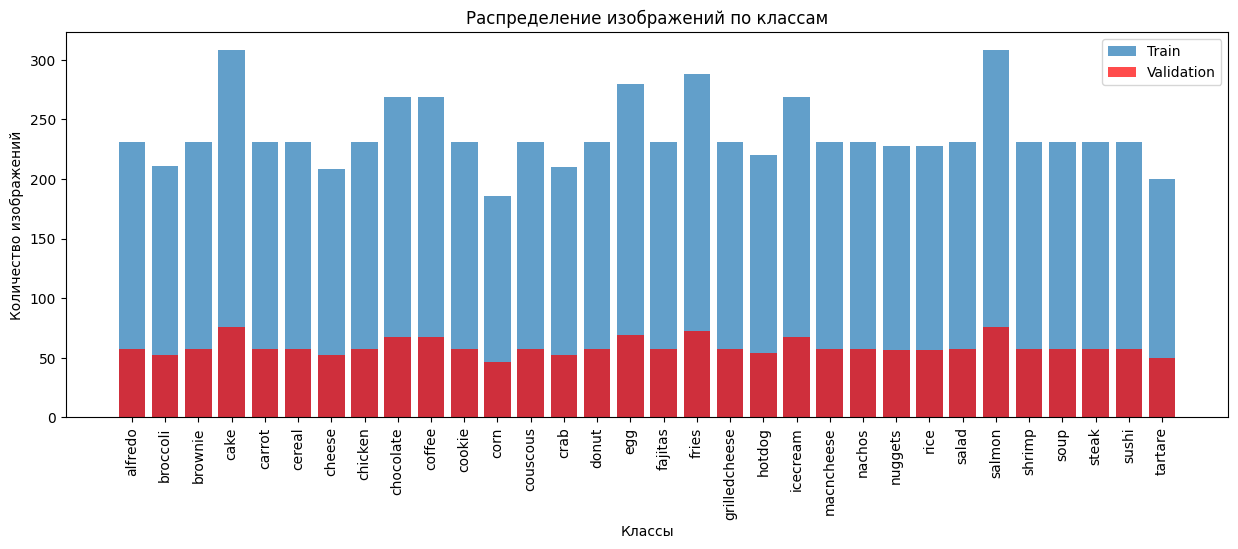

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Получаем список классов
class_labels = list(train_generator.class_indices.keys())

# Считаем количество изображений в каждом классе
train_counts = np.bincount(train_generator.classes)
val_counts = np.bincount(validation_generator.classes)

# Строим график распределения классов
plt.figure(figsize=(15, 5))
plt.bar(class_labels, train_counts, label="Train", alpha=0.7)
plt.bar(class_labels, val_counts, label="Validation", alpha=0.7, color='red')
plt.xticks(rotation=90)
plt.xlabel("Классы")
plt.ylabel("Количество изображений")
plt.title("Распределение изображений по классам")
plt.legend()
plt.show()


## Создаем и обучаем модель

In [6]:
from tensorflow.keras import layers, models

# Определяем параметры модели
input_shape = (img_height, img_width, 3)
num_classes = len(train_generator.class_indices)

# Определяем архитектуру модели CNN
model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Регуляризация для избежания переобучения
        layers.Dense(num_classes, activation='softmax')  # Классификация на 32 класса
    ])

# Компилируем модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Выводим архитектуру модели
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,173,088 (42.62 MB)

 Trainable params: 11,173,088 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

Обучение

In [5]:
history = model.fit(
    train_generator,
    epochs=10, 
    validation_data=validation_generator
)

c:\Users\Sergeja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.0712 - loss: 3.4242 - val_accuracy: 0.4189 - val_loss: 1.9629
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 215s 903ms/step - accuracy: 0.3310 - loss: 2.1286 - val_accuracy: 0.6427 - val_loss: 1.1963
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 218s 915ms/step - accuracy: 0.5049 - loss: 1.4916 - val_accuracy: 0.7267 - val_loss: 0.8650
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 216s 906ms/step - accuracy: 0.5837 - loss: 1.2302 - val_accuracy: 0.7762 - val_loss: 0.7092
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 213s 896ms/step - accuracy: 0.6267 - loss: 1.0713 - val_accuracy: 0.8352 - val_loss: 0.5972
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 202s 848ms/step - accuracy: 0.6819 - loss: 0.9386 - val_accuracy: 0.8522 - val_loss: 0.4584
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 201s 845ms/step - accuracy: 0.7168 - loss: 0.8581 - val_accuracy: 0.8538 - val_loss: 0.4776
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 200s 841ms/step - accuracy: 0.7555 - lo

## Визуализируем процесс обучения

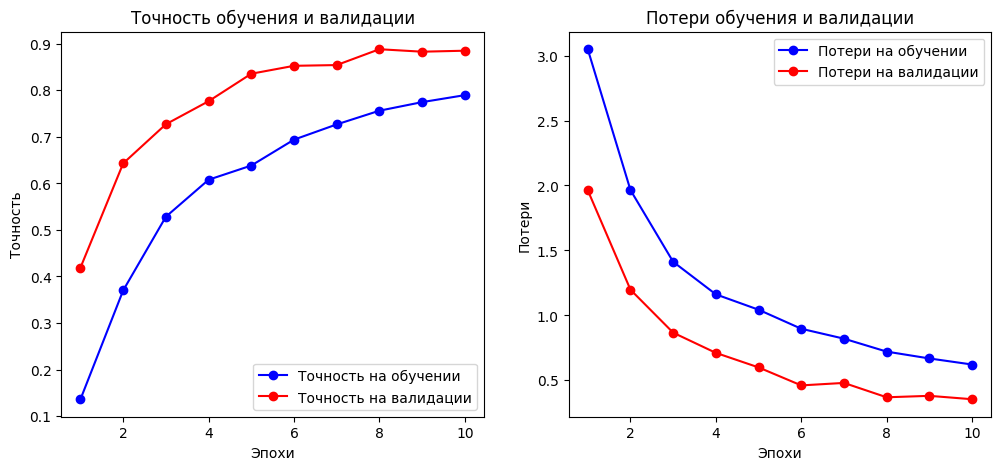

In [6]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Точность на обучении')
plt.plot(epochs, val_acc, 'ro-', label='Точность на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.title('Точность обучения и валидации')

# График потерь
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Потери на обучении')
plt.plot(epochs, val_loss, 'ro-', label='Потери на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.title('Потери обучения и валидации')

plt.show()


## Модель MobileNetV2 (Transfer Learning)

In [1]:
import os

dataset_path = "image/"
print(os.listdir(dataset_path))


['alfredo', 'broccoli', 'brownie', 'cake', 'carrot', 'cereal', 'cheese', 'chicken', 'chocolate', 'coffee', 'cookie', 'corn', 'couscous', 'crab', 'donut', 'egg', 'fajitas', 'fries', 'grilledcheese', 'hotdog', 'icecream', 'macncheese', 'nachos', 'nuggets', 'rice', 'salad', 'salmon', 'shrimp', 'soup', 'steak', 'sushi', 'tartare']


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,       
    width_shift_range=0.2,   
    height_shift_range=0.2,   
    shear_range=0.2,          
    zoom_range=0.2,          
    horizontal_flip=True,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
    fill_mode='nearest'       
)

# Пересоздаем генераторы с аугментацией
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 7609 images belonging to 32 classes.
Found 1881 images belonging to 32 classes.


In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

img_height, img_width = 224, 224
batch_size = 32
input_shape = (img_height, img_width, 3)
num_classes = len(train_generator.class_indices)

# Загружаем предобученную MobileNetV2 (без верхних слоев)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Замораживаем веса базовой модели (чтобы не изменялись при обучении)
base_model.trainable = False

# Добавляем свои слои поверх предобученной модели
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Глобальное усреднение
x = Dense(512, activation='relu')(x)  # Новый полносвязный слой
x = Dropout(0.5)(x)  # Регуляризация
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Выходной слой

# Создаем новую модель
model = Model(inputs=base_model.input, outputs=predictions)

# Компилируем модель
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Выводим архитектуру модели
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,053,408 (11.65 MB)

 Trainable params: 795,424 (3.03 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Обучение

In [4]:
history = model.fit(
    train_generator,
    epochs=8,
    validation_data=validation_generator
)

c:\Users\Sergeja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
238/238 ━━━━━━━━━━━━━━━━━━━━ 237s 978ms/step - accuracy: 0.6595 - loss: 1.2973 - val_accuracy: 0.9904 - val_loss: 0.0455
Epoch 2/8
238/238 ━━━━━━━━━━━━━━━━━━━━ 228s 960ms/step - accuracy: 0.9715 - loss: 0.0999 - val_accuracy: 0.9835 - val_loss: 0.0556
Epoch 3/8
238/238 ━━━━━━━━━━━━━━━━━━━━ 228s 957ms/step - accuracy: 0.9723 - loss: 0.0930 - val_accuracy: 0.9851 - val_loss: 0.0497
Epoch 4/8
238/238 ━━━━━━━━━━━━━━━━━━━━ 229s 963ms/step - accuracy: 0.9792 - loss: 0.0693 - val_accuracy: 0.9942 - val_loss: 0.0198
Epoch 5/8
238/238 ━━━━━━━━━━━━━━━━━━━━ 229s 963ms/step - accuracy: 0.9862 - loss: 0.0466 - val_accuracy: 0.9862 - val_loss: 0.0505
Epoch 6/8
238/238 ━━━━━━━━━━━━━━━━━━━━ 226s 949ms/step - accuracy: 0.9844 - loss: 0.0504 - val_accuracy: 0.9926 - val_loss: 0.0242
Epoch 7/8
238/238 ━━━━━━━━━━━━━━━━━━━━ 228s 958ms/step - accuracy: 0.9826 - loss: 0.0640 - val_accuracy: 0.9894 - val_loss: 0.0374
Epoch 8/8
238/238 ━━━━━━━━━━━━━━━━━━━━ 229s 964ms/step - accuracy: 0.9847 - loss: 0

## Визуализация обучения

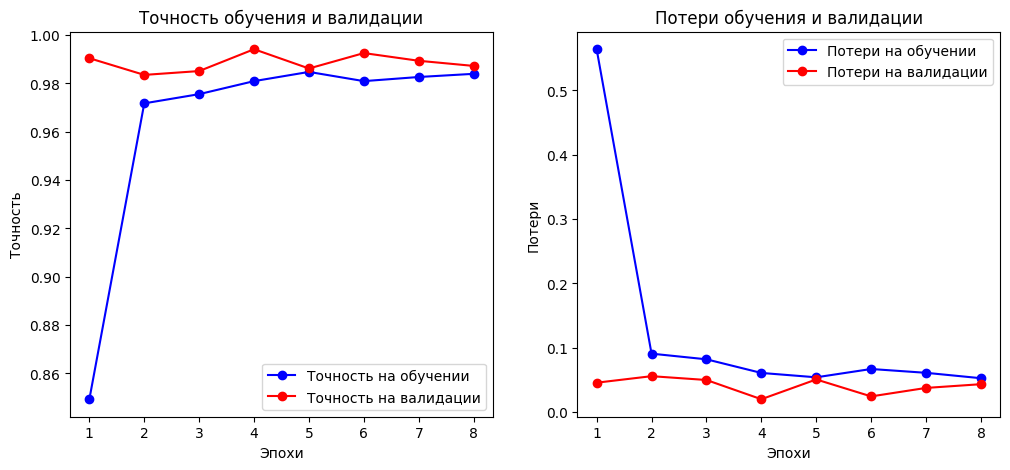

In [5]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Точность на обучении')
plt.plot(epochs, val_acc, 'ro-', label='Точность на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.title('Точность обучения и валидации')

# График потерь
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Потери на обучении')
plt.plot(epochs, val_loss, 'ro-', label='Потери на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.title('Потери обучения и валидации')

plt.show()




59/59 ━━━━━━━━━━━━━━━━━━━━ 49s 835ms/step


<Figure size 1200x1000 with 0 Axes>

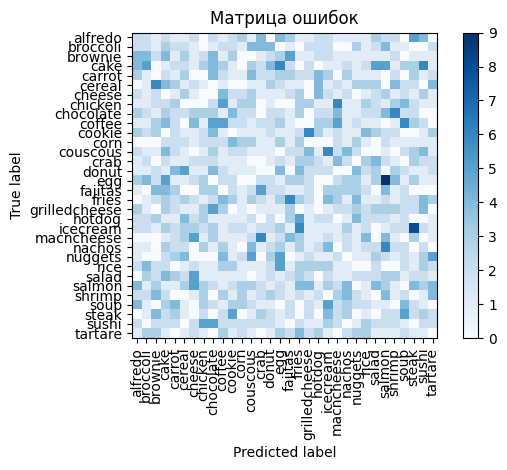

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

val_steps = validation_generator.samples // validation_generator.batch_size + 1

predictions = model.predict(validation_generator, steps=val_steps)
y_pred = np.argmax(predictions, axis=1)

y_true = validation_generator.classes
y_pred = y_pred[:len(y_true)]  

cm = confusion_matrix(y_true, y_pred)
labels = list(validation_generator.class_indices.keys())

plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90, cmap='Blues', include_values=False)
plt.title("Матрица ошибок")
plt.tight_layout()
plt.show()


# Вывод по двум моделям

Видно по точности обучения, что наша рукописная нейронная сеть выдает плохой результат. Будем использовать MobileNetV2, так как она базируется на картинках и выдает хорошую точность на тестах

Сохраняем модель

In [14]:
# Сохраняем модель как .h5
model.save("content/food_classifier_model.h5")


# Вторая модель

## Загрузка первой модели в переменную

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Загружаем модель
model = load_model('content/food_classifier_model.h5')
img_height, img_width = 224, 224

## Функции, которые работают с первой моделью

In [5]:
import os
import random

# Разбираем папки в image на классы
def get_class_labels():
    classes_dir = os.path.join('image')
    return sorted([d for d in os.listdir(classes_dir) 
                 if os.path.isdir(os.path.join(classes_dir, d))])

# Пытаемся сделать рандомный выбор
def get_random_photo():
    root_folder = "image"
    class_folders = [d for d in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, d))]
    random_class = random.choice(class_folders)
    class_path = os.path.join(root_folder, random_class)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]
    random_image = random.choice(image_files)
    img_path = os.path.join(class_path, random_image)
    # print(f"Класс: {random_class}")
    # print(f"Файл: {random_image}")
    # print(f"Полный путь: {img_path}")
    return img_path

# Предсказание класса по изображению
def predict_class(model, img_path):
    # Получаем метки классов из структуры датасета
    class_labels = get_class_labels()
    # print(class_labels)
    
    # Загрузка и обработка изображения
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    pred = model.predict(img_array)
    return class_labels[np.argmax(pred)] #, np.max(pred) # Возвращаем предсказанное блюдо и вероятность "правильности"



# Проверка
predicted_label = predict_class(model, get_random_photo())

print(f"Предсказанное блюдо: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Предсказанное блюдо: grilledcheese


## Зависимости

In [17]:
!pip install -q huggingface_hub
!pip install transformers accelerate



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 354.7/354.7 kB 957.0 kB/s eta 0:00:00
     -------------------------------------- 204.2/204.2 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 10.0 MB/s eta 0:00:00
     -------------------------------------- 134.9/134.9 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 6.2/6.2 MB 11.0 MB/s eta 0:00:00
     ------------------------------------- 536.2/536.2 kB 11.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Вход и установка

In [6]:
from huggingface_hub import login
login(token="")

c:\Users\Sergeja\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
model_id = "mistralai/Mistral-7B-Instruct-v0.2"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model_neo = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",            # Использует GPU, если доступен
    torch_dtype=torch.float16     # Используй float32, если нет GPU
)

Loading checkpoint shards: 100%|██████████| 3/3 [01:19<00:00, 26.49s/it]


## Функции для работы второй модели

In [8]:
def get_prompt(dish_name):
    return f"[INST] Ты диетолог. Оцени, сколько калорий примерно содержит блюдо '{dish_name}'. Укажи калорийность и кратко прокомментируй, подходит ли оно для сбалансированного питания. [/INST]"

# Токенизация с перемещением на устройство модели
def get_answer_from_neo(prompt):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model_neo.device)

    # Генерация текста
    output = model_neo.generate(
        input_ids,
        do_sample=True,
        temperature=0.7,
        max_new_tokens=200,  
        pad_token_id=tokenizer.eos_token_id,
        top_p = 0.85,
        repetition_penalty=1.1,
        no_repeat_ngram_size=3
    )

    # Декодируем только сгенерированную часть (исключая промпт)
    generated_text = tokenizer.decode(output[0][input_ids.shape[1]:], skip_special_tokens=True)

    return generated_text

## Ответ модели

In [9]:
# проверка
print("Ответ:\n" )
promt = get_prompt(predict_class(model,get_random_photo()))
print(promt)
print(get_answer_from_neo(promt))

Ответ:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


[INST] Ты диетолог. Оцени, сколько калорий примерно содержит блюдо 'fries'. Укажи калорийность и кратко прокомментируй, подходит ли оно для сбалансированного питания. [/INST]
Я не диетология специалист, но я могу помочь тебе оценить количество калорий в фрицах (помидорным или картофельным).

1. Помидорные фрицы: 100 г помидоров фрицев содержат около 22 ккал, а также еще несколько каллорий от соли, рапса и других ингредиентов. В целом, 150-200 граммов помидов фрицев содерживать могут до 205-300 калории. Это не очень большая часть питательных веществ и может использоваться в рамках балансированного пиtaния в сочетании с другими питающими про
